<a href="https://colab.research.google.com/github/dote7ant/SVM_/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis for Nairobi Hospital clinical camp hypothyroidism data.

#### Introduction

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### a. Defining the question.

The data is focused on thyroid patients. Using this data we are required to build a model that determines whether a patient has hypothyroid or not. We will be working with SVM, decision trees and random forests.

This are the models we will use:


*   Random Forests
*   Ada boosting
*   Gradient boosting
*   Support Vector Classifiers - radial basis function (rbf), linear function and polynomial function.



We will determine the best model to use to predict whether a patient has a hypothyroid or not.


#### b. Defining the metrics of succes.

For this project to be successful we should aim to deliver the following:
1. Find the factors that contribute to a patient having hypothyroid or not.
2. Find and accuracy score close to 1 at about 0.90 or higher will be consider successful.
3. An f1 score of 0.8 or higher will be considered successful.
4. From the perfomances of the models we will draw conclusions from it and offer recommendations.
5. Lastly we will do research on hypothyroidism in order to understand the dataset much better.

#### c. Understanding the context.

**About Nairobi hospital**

The Nairobi Hospital is a private hospital located in upperhill area, Nairobi, Kenya.The hospital was founded in 1954 as a European hospital.



---
**About the data**

The data is obtained from a clinical boot camp that was performed by Nairobi Hospital on the patients that attended it. The aim was to record the various characteristics of a patient that is (age, sex, on_thyroxine, query_on_thyroxine,    on_antithyroid_medication,thyroid_surgery, query_hypothyroid,       query_hyperthyroid, pregnant, sick, tumor, lithium, goitre) and the hormone test for the following hormones(TSH_measured, TSH, T3_measured, T3, TT4_measured, TT4, T4U_measured, T4U, FTI_measured, FTI' TBG_measured, TBG) and finally whether the patient tested positive for hypothyroid or negative.

The aim for this was to get the characteristics and have data scientists use this data to determine whether a patient has hypothyroidism or not.


#### d. Recording the experimental design.

The following are the steps that we will take to conduct this project. They are listed below:


1. loading the required libraries
2. loading the data set
3. check the data
4. data preparation
5. validate the data
6. performing Exploratory Data Analysis (EDA) 
7. fit the data 
8. train the models
9. make predictions using the various models
10. evaluate the performance of the models
11. draw conclusions
12. make recommendations



## 1. Reading the data and importing all the required libraries


In [2]:
# Import libraries
import pandas as pd
import numpy as np

# graphings
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# forests and decision tree imports as well as train test 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Import Suport Vector Classifier module from svm library.
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA


# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error, confusion_matrix, mean_absolute_error, accuracy_score, f1_score

# graphic for the forests and trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the data set

In [4]:
# url to hold the path to the data set
url = "/content/hypothyroid.csv"

# read the data set and create a dataframe 
df = pd.read_csv(url)

# display some rows in the data set
df.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

## 2. Check the data

Check the column names

In [3]:
# check the column names
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

We do not see any column names that we will want to rename. Below is the data set glossary.
1. Age
2. Sex
3. on_thyroxine
4. query_on_thyroxine
5. on_antithyroid_medicationthyroid_surgery
6. query_hypothyroid
7. query_hyperthyroid
8. pregnant
9. sick
10. tumor
11. lithium
12. goitre
13. TSH_measured
14. TSH
15. T3_measured
16. T3
17. TT4_measured
18.  TT4

**What is TSH, T3, TT4, T4U, FTI, TBG ?**

From our research we have determined the above to mean? 

Several hormones are tested to access the presence of thyrodism they are listed below:


---


(TSH) thyroid stimulating hormone — produced by the pituitary gland that regulates thyroid function. Also the best screening test to determine if the thyroid is functioning normally.


---


Triiodothyronine (T3): the active thyroid hormone, usually produced from thyroxine.


---


Thyroxine (T4): the major hormone produced by the thyroid gland. T4 gets converted to the active hormone T3 in various tissues in the body.



Let us preview our data

In [4]:
# preview the first 10 rows
df.head(10)

status age sex on_thyroxine  ... FTI_measured   FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y    10            n   ?
1  hypothyroid  15   F            t  ...            y    17            n   ?
2  hypothyroid  24   M            f  ...            y     0            n   ?
3  hypothyroid  24   F            f  ...            y     6            n   ?
4  hypothyroid  77   M            f  ...            y    44            n   ?
5  hypothyroid  85   F            f  ...            y    23            n   ?
6  hypothyroid  64   F            f  ...            y    63            n   ?
7  hypothyroid  72   F            f  ...            y    32            n   ?
8  hypothyroid  20   F            f  ...            y    32            n   ?
9  hypothyroid  42   F            f  ...            y  7.50            n   ?

[10 rows x 26 columns]

In [5]:
# preview the last 10 rows
df.tail(10)

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3153  negative  78   F            f  ...            y   99            n   ?
3154  negative  72   F            t  ...            y  223            n   ?
3155  negative   ?   F            f  ...            y  124            n   ?
3156  negative  40   F            f  ...            y   84            n   ?
3157  negative  69   F            f  ...            y  124            n   ?
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[10 rows x 26 columns]

We can observe that some rows have question marks. We need to investigate this.

In [6]:
# check the column data types 
print("The data types in our data set for various columns is as shown below:\n")
df.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   obje

There are a total of 26 columns and 3163 entries which we also see that there are 3163 non-null values. This tells us that there are no missing values in our data. But we do have the question marks that we had previously observed. All the data types are classified as object that is string. Age clearly cannot be a string. TSH, T3, TT4, T4U, FTI are also classified as objects but should be floats. We will need to change this to the appropriate data types.

In [7]:
# check number of rows and columns in the data set
df.shape
print("There are", df.shape[0], "rows and", df.shape[1], "columns in our data set.")

There are 3163 rows and 26 columns in our data set.


In [8]:
# check the unique values in the data set
for column in df.columns:
  print("***************************", column, "********************************")
  print("This column has", df[column].nunique(), "unique values, they are shown below:\n")
  print(df[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** status ********************************
This column has 2 unique values, they are shown below:

['hypothyroid' 'negative']
________________________________________________________________________________________________

________________________________________________________________________________________________

*************************** age ********************************
This column has 93 unique values, they are shown below:

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
__________________________________________________________________

So what can we observe. Some columns have boolean that atleast that is our assumption. Others have numerical data and others categorical data. We do also get to see the question mark. But we had observed that all the columns have an object data type so this needs to be changed to the appropriate data types.

We conclude that when a question mark is present it could indicate that it is a missing value or a test was never conducted.

Since this is a medical data set it would not do to just add any values we need to add the population mean and confirm this is with a very roboust imputing technique.



In [9]:
# check for missing values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

The data set contains no missing values.

In [10]:
# check for duplicates
print("There are duplicates in our data set:", df.duplicated().any())

There are duplicates in our data set: True


In [11]:
# show the values that are duplicates except the first occurence
df[df.duplicated()]

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
53    hypothyroid  69   F            f  ...            y   61            n   ?
66    hypothyroid  62   M            f  ...            y   10            n   ?
124   hypothyroid  77   F            f  ...            y   49            n   ?
128   hypothyroid  79   F            f  ...            y   48            n   ?
131   hypothyroid  50   F            t  ...            y   60            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3048     negative  28   M            f  ...            y  103            n   ?
3055     negative  33   F            f  ...            y   86            n   ?
3066     negative  74   F            t  ...            y  107            n   ?
3111     negative  89   M            f  ...            y  103            n   ?
3151     negative  58   F            f  ...            y  108            n   ?

[77 rows x 26 columns]

We have 77 rows with duplicates this are alot. We will drop them later on. We cannot plot boxplots here since the data types are still not change so we will do it after the tidying.

## 3. Tidying up the data

We will remove duplicates, change the column data types to the appropriate ones, change the ? to null and then determine what to do with them. And finally check for outliers.

In [5]:
# start with removing duplicates

# drop our duplicates that we found
df.drop_duplicates(keep='first', inplace = True)

df1 = df.copy()
# confirm there are no more duplicates
print("The data has duplicates: ", df1.duplicated().any())

The data has duplicates:  False


There are no more duplicates

In [13]:
# we check how many rows and columns we have
print("There are", df1.shape[0], "rows and", df1.shape[1], "columns in our data set.")

There are 3086 rows and 26 columns in our data set.


In [6]:
# we have to replace the question mark with null as we determined this is missing data 
df1.replace('?', np.nan, inplace=True)

In [7]:
# find missing values
df1.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

We can now observe that age, sex, TSH, T3, TT4, T4U, FTI have missing values. TBG has so many missing values close the amount of data we have. We will just drop this column and its TBG_measured column.

In [8]:
# dropping the TBG and TBG_measured columns 
df1.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

Success columns dropped successfully. We now impute the remaining columns with missing values with the mean.

In [9]:
# filling missing values in the sex column with mode
df1['sex'].fillna(df1['sex'].mode()[0], inplace = True)

In [11]:
pip install impyute

In [12]:
# list of columns we will convert to float
num = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# convert the column data types to float 
for i in np.arange(0,6,1):
  df1[num[i]] = df1[num[i]].astype('float')

from impyute.imputation.cs import mice
train = df1[num]
# start the MICE training
imputed_training = mice(train.values)

# concatenate our data that is now imputed with the old data set
df_new = pd.concat([df1.drop(columns= num), pd.DataFrame(imputed_training, columns=num)], axis=1)

Why use MICE? Mice works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns. For more information about it [click here.](https://www.jstatsoft.org/article/view/v045i03/v45i03.pdf)

In [13]:
# check for any repetition of columns
df_new.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [14]:
# check for missing values
df_new.isnull().sum()

status                       75
sex                          75
on_thyroxine                 75
query_on_thyroxine           75
on_antithyroid_medication    75
thyroid_surgery              75
query_hypothyroid            75
query_hyperthyroid           75
pregnant                     75
sick                         75
tumor                        75
lithium                      75
goitre                       75
TSH_measured                 75
T3_measured                  75
TT4_measured                 75
T4U_measured                 75
FTI_measured                 75
age                          75
TSH                          75
T3                           75
TT4                          75
T4U                          75
FTI                          75
dtype: int64

In [15]:
# drop missing values
df_new.dropna(inplace = True)

In [23]:
# check for missing values
df_new.isnull().sum()

status                       0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
age                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
dtype: int64

In [24]:
# check the shape
print("There are", df_new.shape[0], "rows and", df_new.shape[1], "columns in our data set.")

There are 3011 rows and 24 columns in our data set.


Our df1 had 3086 rows but after running mice we got null values in all the columns so we decided to drop them since there are not that many. We get a data set with 3011 rows which we are comfortable with.

In [16]:
# change the data types for  age to integer

# start off by converting age to int
df_new['age'] = df_new['age'].astype('int')

# list of columns we will convert to categorical 
cat = ['status', 'sex','TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
for column in cat:
  df_new[column] = df_new[column].astype('category')


# list of columns we will convert to boolean values
bool_ = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# first we replace the f and t with False and True respectively
for column in bool_:
  df_new[column] = df_new[column].replace('f', False)
  df_new[column] = df_new[column].replace('t', True)
# we convert this columns to boolean
for column in bool_:
  df_new[column] = df_new[column].astype('bool')

# confirm if the change was successful
df_new.dtypes

status                       category
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                 category
T3_measured                  category
TT4_measured                 category
T4U_measured                 category
FTI_measured                 category
age                             int64
TSH                           float64
T3                            float64
TT4                           float64
T4U                           float64
FTI                           float64
dtype: object

In [17]:
# make a copy of the data frame
out = df_new.copy()

In [36]:
out.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

We now check for outliers.

In [37]:
# we find the quantile information to get outliers any figure that is less than this (Q1 - 1.5 * IQR)))  is a suspected outlier and any figure
# greater than this ( (Q3 + 1.5 * IQR)))  is a suspected outlier
Q1 = out[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].quantile(0.25)
Q3 = out[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].quantile(0.75)
IQR = Q3 - Q1
a = (out[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']] < (Q1 - 1.5 * IQR)) |(out[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']] > (Q3 + 1.5 * IQR))
a
# note when we have False there is no suspected outlier and if the value is True we have an outlier.

age    TSH     T3    TT4    T4U    FTI
0     False   True  False   True   True   True
1     False   True  False   True  False   True
2     False  False   True   True  False   True
3     False   True  False   True  False   True
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
3081  False  False  False  False  False  False
3082  False  False  False  False  False  False
3083  False  False  False  False  False  False
3084  False  False   True  False   True  False
3085  False  False  False  False  False  False

[3011 rows x 6 columns]

This is a boxplot for the outliers for the different numerical columns. We decide 

In [38]:
# first we check which columns have outliers
b = a.any() == True
print("These are the columns with outliers:\n",b)

# if the value is False then that column does not have outliers otherwise it does.

These are the columns with outliers:
 age    True
TSH    True
T3     True
TT4    True
T4U    True
FTI    True
dtype: bool


All our numerical columns have outliers.

What is our assumption? We assume that all types of people went for the clinical bootcamp. For this reason we do not remove the outliers. This levels of hormones could make sense in that the patient could be sick from other diseases that might influnce the levels lower or higher. 

## 4. Exploratory Data Analysis

### a. Univariate analysis

In [18]:
# make a copy of the data frame
df_clean = out.copy()

In [29]:
# get brief summary statistics about our data
df_clean.describe()

age          TSH  ...          T4U          FTI
count  3011.000000  3011.000000  ...  3011.000000  3011.000000
mean     51.413484     5.619800  ...     0.978879   115.287554
std      18.439974    21.843914  ...     0.217003    57.464544
min      -1.000000   -52.557578  ...     0.000000     0.000000
25%      37.000000     0.000000  ...     0.860000    92.000000
50%      53.000000     0.900000  ...     0.970000   110.000000
75%      65.000000     4.700000  ...     1.050000   126.000000
max     127.000000   530.000000  ...     2.210000   881.000000

[8 rows x 6 columns]

We observe that mean age is 51 years and the least age is 1.

In [30]:
# get the count for columns with the data type as object 
df_clean.describe(include=np.bool)

on_thyroxine query_on_thyroxine  ... lithium goitre
count          3011               3011  ...    3011   3011
unique            2                  2  ...       2      2
top           False              False  ...   False  False
freq           2577               2957  ...    3009   2921

[4 rows x 11 columns]

We observe that through out all the boolean columns False is the most common response.

In [31]:
# get the variance 
df_clean.var()

on_thyroxine                    0.123403
query_on_thyroxine              0.017618
on_antithyroid_medication       0.013436
thyroid_surgery                 0.032429
query_hypothyroid               0.071138
query_hyperthyroid              0.070012
pregnant                        0.019855
sick                            0.029943
tumor                           0.013112
lithium                         0.000664
goitre                          0.029007
age                           340.032629
TSH                           477.156578
T3                              0.818662
TT4                          1827.541139
T4U                             0.047090
FTI                          3302.173870
dtype: float64

There is high variance in FTI has the highest variance followed by TT4, TSH and age follow in that order. This tells use we might need to normalize our data.

In [32]:
# get the kurtosis
df_clean.kurt()

on_thyroxine                    2.111698
query_on_thyroxine             50.863937
on_antithyroid_medication      68.568632
thyroid_surgery                24.889894
query_hypothyroid               8.077330
query_hyperthyroid              8.303841
pregnant                       44.457116
sick                           27.455779
tumor                          70.407318
lithium                      1502.997341
goitre                         28.535723
age                            -0.509069
TSH                           187.779432
T3                             12.077463
TT4                             7.875386
T4U                             3.947858
FTI                            54.849876
dtype: float64

We observe that all our columns are leptokurtic. How is it useful? It is a useful measure of whether there is a problem with outliers in a data set. Larger kurtosis indicates a more serious outlier problem, and may lead the researcher to choose alternative statistical methods. We observe that lithium has a kurtosis of 1502 which is very big compared to the rest of the columns.

#### Distribution plots

In [33]:
df_clean.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

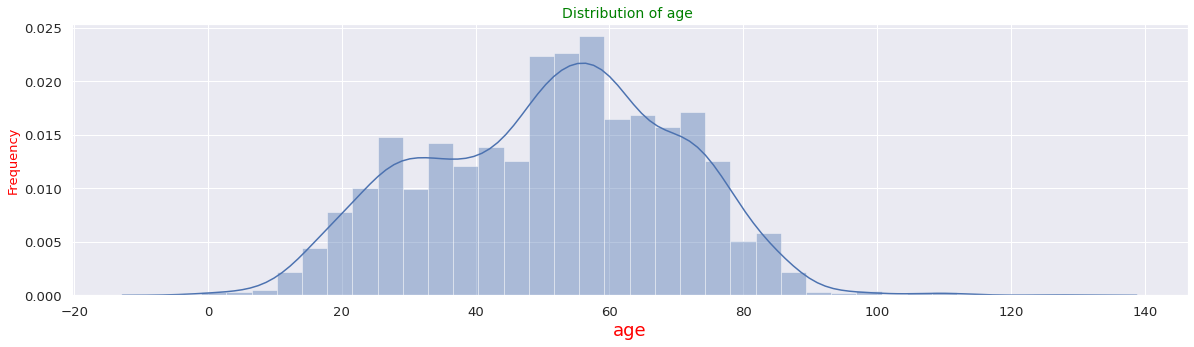

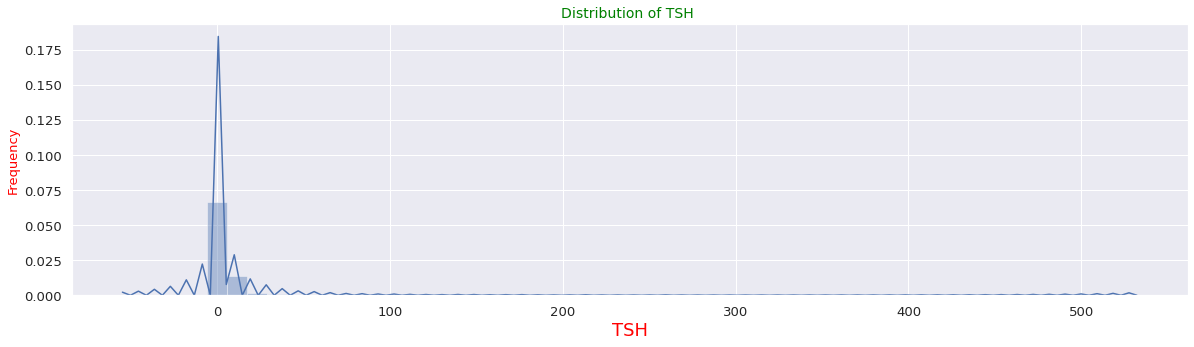

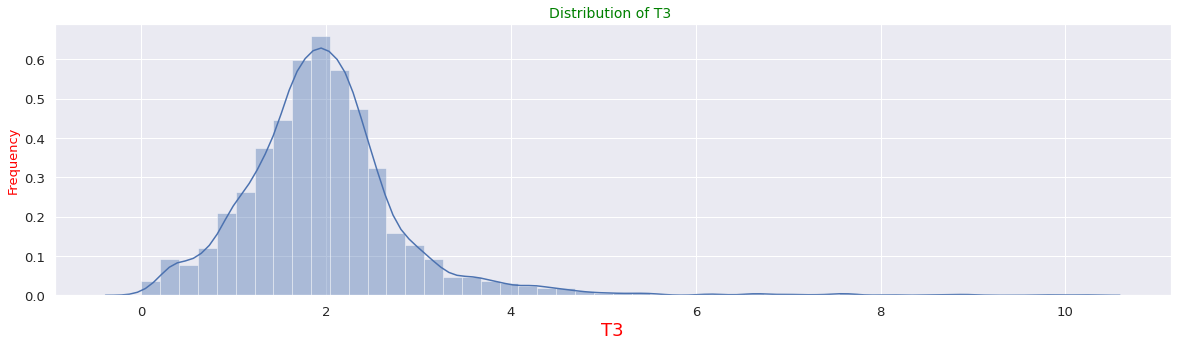

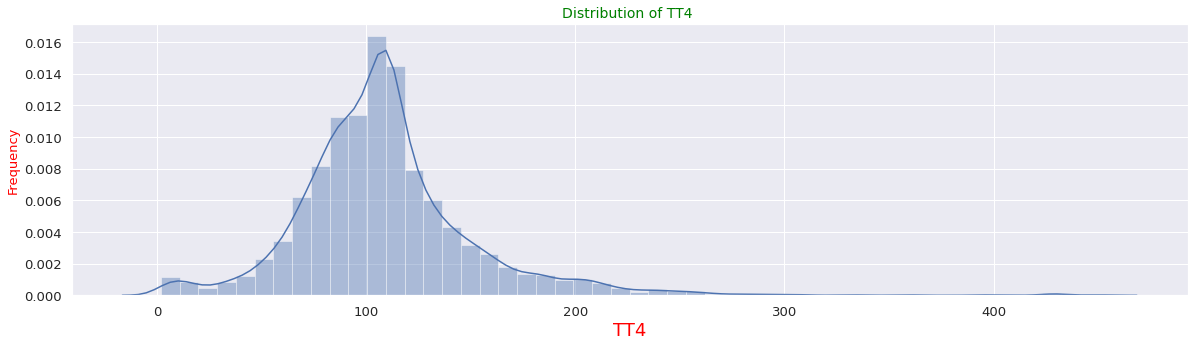

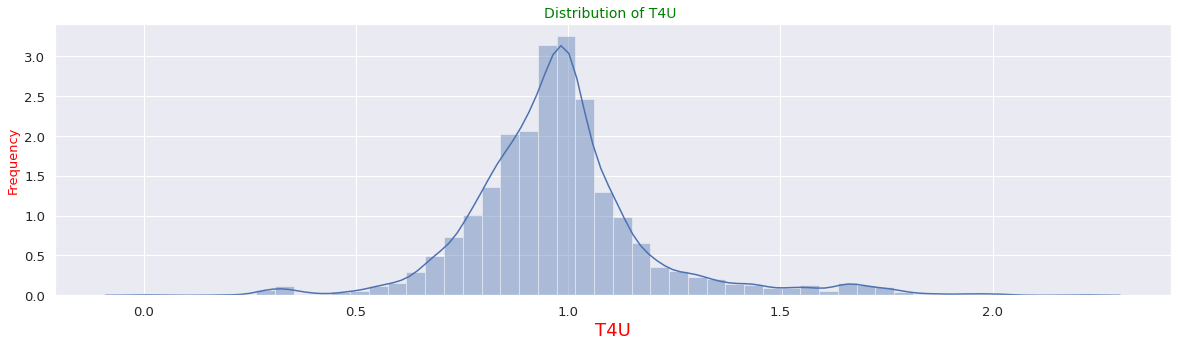

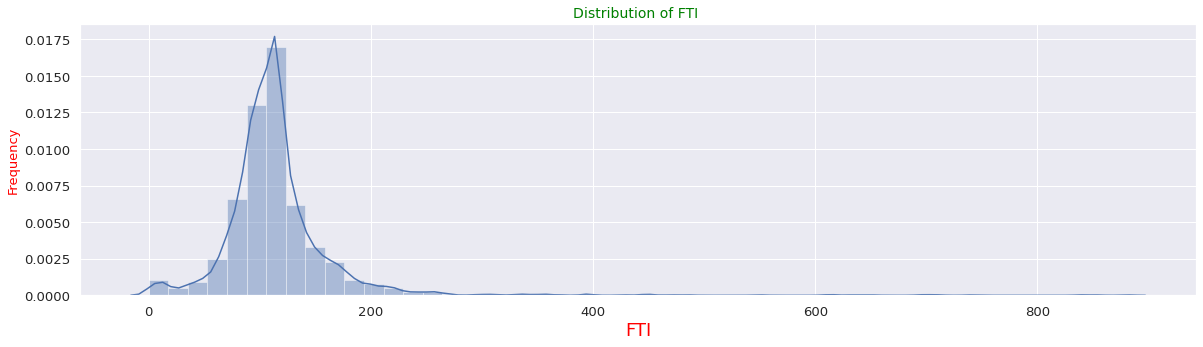

In [34]:
# get the numerical data 
nums = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# loop to plot our distribution plots for our numerical data
for i in np.arange(0, 6, 1):
  plt.figure(figsize = (20, 5))
  sns.distplot(df_clean[nums[i]])
  plt.title(f'Distribution of {nums[i]} ', fontsize = 14, color = "green")
  plt.xlabel(nums[i], fontsize = 18, color = 'red')
  plt.ylabel('Frequency', fontsize = 13, color = 'red')

We observe tha age is skewed to the right, the other columns have a more bell shaped curve with tails on both ends. We need now to find the skewness of the data.




In [35]:
# get the skewness of our data 
df_clean.skew()

on_thyroxine                  2.027386
query_on_thyroxine            7.268435
on_antithyroid_medication     8.397802
thyroid_surgery               5.183952
query_hypothyroid             3.173636
query_hyperthyroid            3.209100
pregnant                      6.813779
sick                          5.425637
tumor                         8.506501
lithium                      38.781426
goitre                        5.524198
age                          -0.106532
TSH                          11.154320
T3                            2.141261
TT4                           1.552528
T4U                           0.993574
FTI                           5.551135
dtype: float64

We observe that our data is skewed to the right. This means that the median and mode is greater than the mean. Lithium is most skewed followed by TSH. Age is the least positively skewed column. The right tail is longer than the left tail.

#### Bar charts

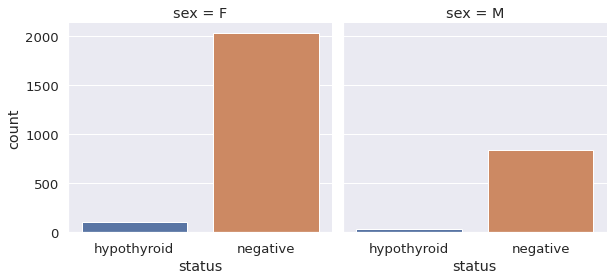

In [37]:
# plotting bar charts
sns.catplot("status", col="sex", col_wrap=4, data=df_clean, kind="count", height=4)
plt.show()

We observe that there are more negative cases of hypothyroid which might affect our ability to make accurate predictions. We also do observe that more women were tested and that more of them had hypothyroid compared to men.

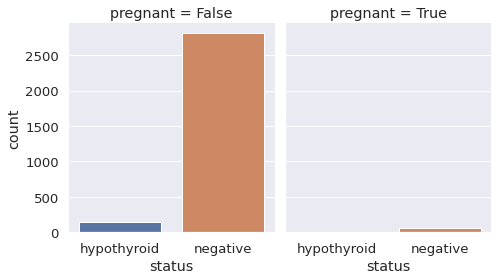

In [38]:
# plotting bar charts
sns.catplot("status", col= "pregnant", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

It is observed that pregnant women did not test positive for hypothyroid which is understandable as most female hormones behave differently during pregnancy.

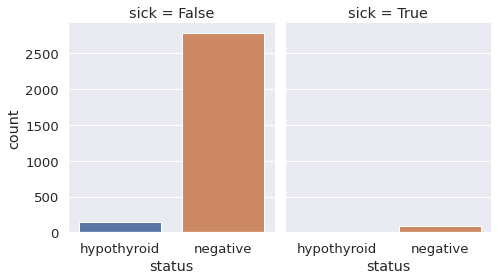

In [39]:
# plotting bar charts
sns.catplot("status", col="sick", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

Again if some one was sick they did not test positive for hypothyroid.

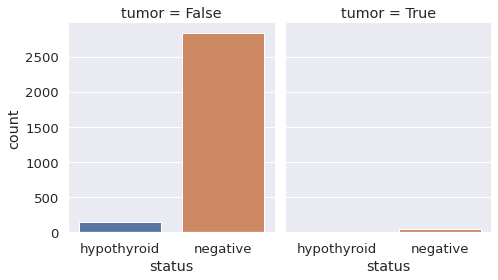

In [40]:
# plotting bar charts
sns.catplot("status", col="tumor", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

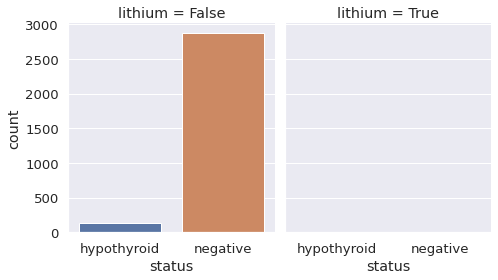

In [41]:
# plotting bar charts
sns.catplot("status", col="lithium", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

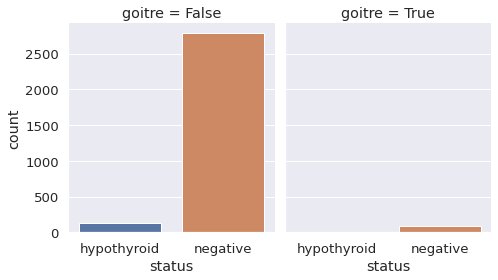

In [42]:
# plotting bar charts
sns.catplot("status", col="goitre", col_wrap=4, data=df_clean, kind="count", height=4, aspect=.8)
plt.show()

What do we observe through out? In all the cases that test False there are lots of people in that bracket. And there are more people who test positive compared to the True side. This means that majority of the people tested had no tumor, pregnancy, goitre, were not sick. This might tell us we need more samples that test positive to be in a position to make better predictions. 

### b. Bivariate analysis

#### Pair plots

In [43]:
df_clean.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

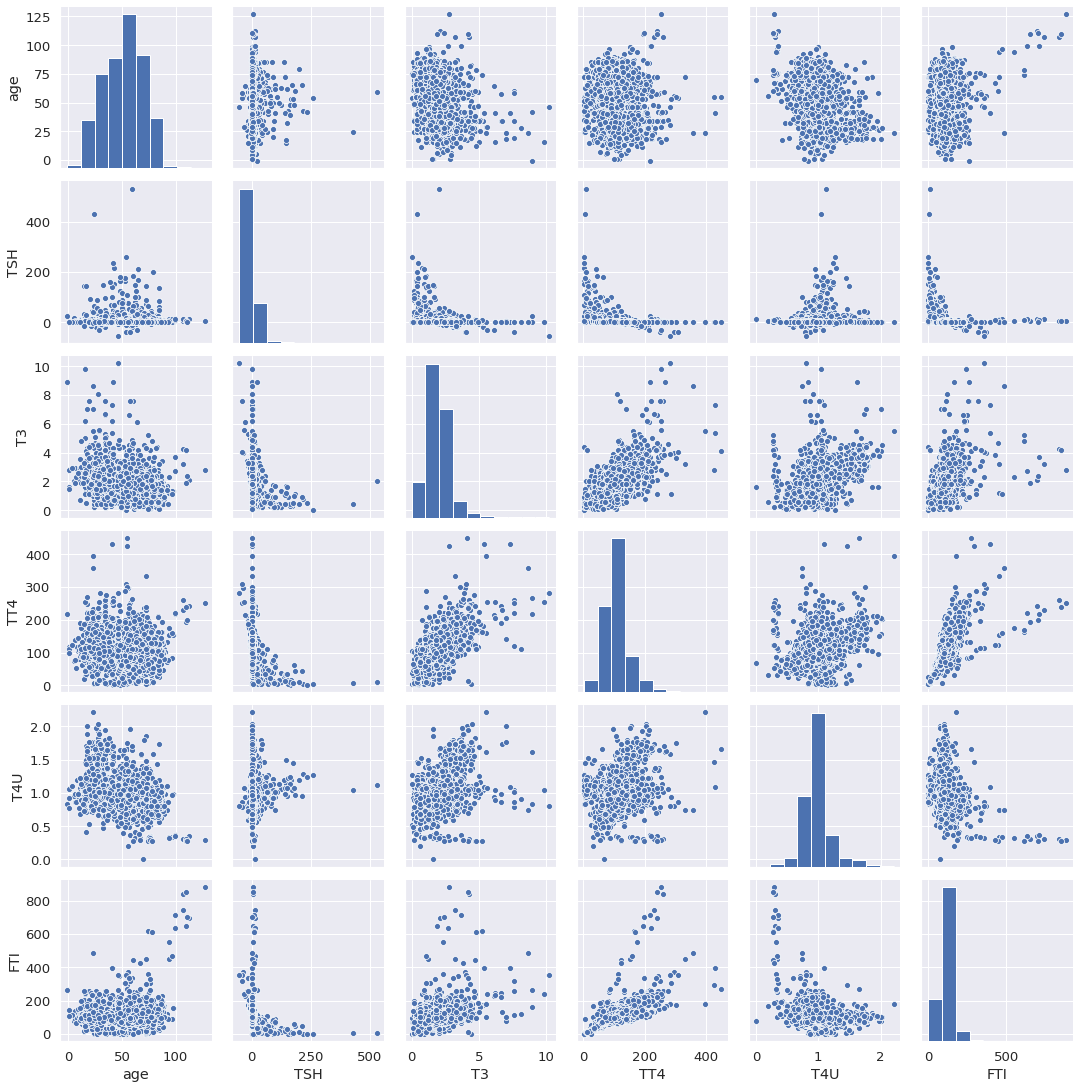

In [44]:
# get the numerical data 
nums = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

sns.pairplot(df_clean[nums])
plt.show()

We observe that most of the pair plots have clusters around certain points. This tells us that most data point are common with our sample and thus anything else is viewed as an outlier.

#### Correlation

In [45]:
# get the numerical data 
nums = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
# get the correlation
corr = df_clean[nums].corr()
corr

age       TSH        T3       TT4       T4U       FTI
age  1.000000 -0.009218 -0.354144 -0.074169 -0.263863  0.156590
TSH -0.009218  1.000000 -0.205012 -0.334716  0.083340 -0.266402
T3  -0.354144 -0.205012  1.000000  0.610464  0.405775  0.336859
TT4 -0.074169 -0.334716  0.610464  1.000000  0.325379  0.678116
T4U -0.263863  0.083340  0.405775  0.325379  1.000000 -0.289087
FTI  0.156590 -0.266402  0.336859  0.678116 -0.289087  1.000000

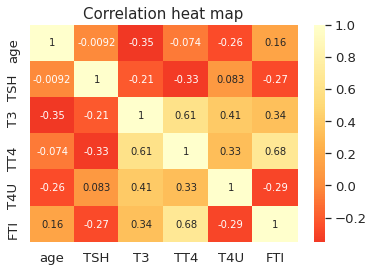

In [46]:
sns.heatmap(corr, cmap='YlOrRd_r', annot = True, center = 0)
plt.title('Correlation heat map', fontsize = 15)
plt.show()

Correlation is the degree to which two pairs are linearly related. 

There is a positive strong relationship between TT4 and T3 of 0.61. There is also a positive strong relationship between FTI and TT4 of 0.68 (This is the highest positive correlation). 

## 5 Decision Tree based Classifiers

### Random Forest classifier.

In [19]:
# make a copy of the data set
forest = df_clean.copy()
forest.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [48]:
# preview the data 
forest.head()

status sex  on_thyroxine  query_on_thyroxine  ...   T3   TT4   T4U   FTI
0  hypothyroid   M         False               False  ...  0.6  15.0  1.48  10.0
1  hypothyroid   F          True               False  ...  1.7  19.0  1.13  17.0
2  hypothyroid   M         False               False  ...  0.2   4.0  1.00   0.0
3  hypothyroid   F         False               False  ...  0.4   6.0  1.04   6.0
4  hypothyroid   M         False               False  ...  1.2  57.0  1.28  44.0

[5 rows x 24 columns]

#### Function

In [20]:
#### change the categorical and boolean columns to 0 and 1

# list of columns that are to categorical 
cat = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']

# list of columns that are boolean values
bool_ = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
for column in bool_:
  forest[column] = np.where(forest[column] == 'False', 1, 0)

# yes no columns
for column in cat:
  forest[column] = np.where(forest[column] == 'y', 1, 0)

# we finish off by doing the same for sex
forest['sex'] = np.where(forest['sex'] == 'M', 1, 0)


In [21]:
# confirm the code worked
forest.head()

status  sex  on_thyroxine  query_on_thyroxine  ...   T3   TT4   T4U   FTI
0  hypothyroid    1             0                   0  ...  0.6  15.0  1.48  10.0
1  hypothyroid    0             0                   0  ...  1.7  19.0  1.13  17.0
2  hypothyroid    1             0                   0  ...  0.2   4.0  1.00   0.0
3  hypothyroid    0             0                   0  ...  0.4   6.0  1.04   6.0
4  hypothyroid    1             0                   0  ...  1.2  57.0  1.28  44.0

[5 rows x 24 columns]

#### Function

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

test_features = [ 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest.drop('status', axis = 1)
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

class trees:
  def __init__(self, X, y, test_features):
    self.X = X
    self.y = y
    self.test_features = test_features
    
  def rand_tree(self, n, s, d):
    forest = RandomForestClassifier(n_estimators =n, random_state=42, min_samples_split =s, max_depth=d)
    forest = forest.fit(X_train, y_train)
    tree = DecisionTreeClassifier(max_depth=d)

    # Train it on our training set.
    tree = tree.fit(X_train, y_train)

    # Predict based on the model we've trained, note that we apply it to the whole data set 
    y_pred_tree = tree.predict(X)

    # Predict based on the model we've trained
    y_pred = forest.predict(X_test)
    comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(comparison_frame.describe())

    # And now we assess the scores
    print('The accuracy score is:', accuracy_score(y_test, y_pred))
    print('The f1 score is:', f1_score(y_test, y_pred))
    def viz(self):
      dot_data = StringIO()
      # pick a specific tree from the forest
      tree = forest.estimators_[50]

      export_graphviz(tree, out_file=dot_data,  
                      filled=True, rounded=True,
                      special_characters=True,feature_names = test_features)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
      graph.write_png('absenteism_forest.png')
      display(Image(graph.create_png()))
    viz(self)
    def imp(self):
      # Get numerical feature importances
      importances = list(tree.feature_importances_)

      # We now use some Python magic to connect each feature with its importance
      # List of tuples with variable and importance
      feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

      print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
      print()

      # Nice to have: We can sort the values in descending order, since we care about the most important features first.
      feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

      # Print out the feature and importances 
      [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

      # list of x locations for plotting
      x_values = list(range(len(importances)))
      # Make a bar chart
      plt.bar(x_values, importances, orientation = 'vertical')
      # Tick labels for x axis
      plt.xticks(x_values, test_features, rotation='vertical')
      # Axis labels and title
      plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
    imp(self)
 

#### Function  call with all the features (Baseline model)


In [24]:
# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.030973
std      0.193026    0.173342
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      1.000000    1.000000
The accuracy score is: 0.9834070796460177
The f1 score is: 0.7619047619047619


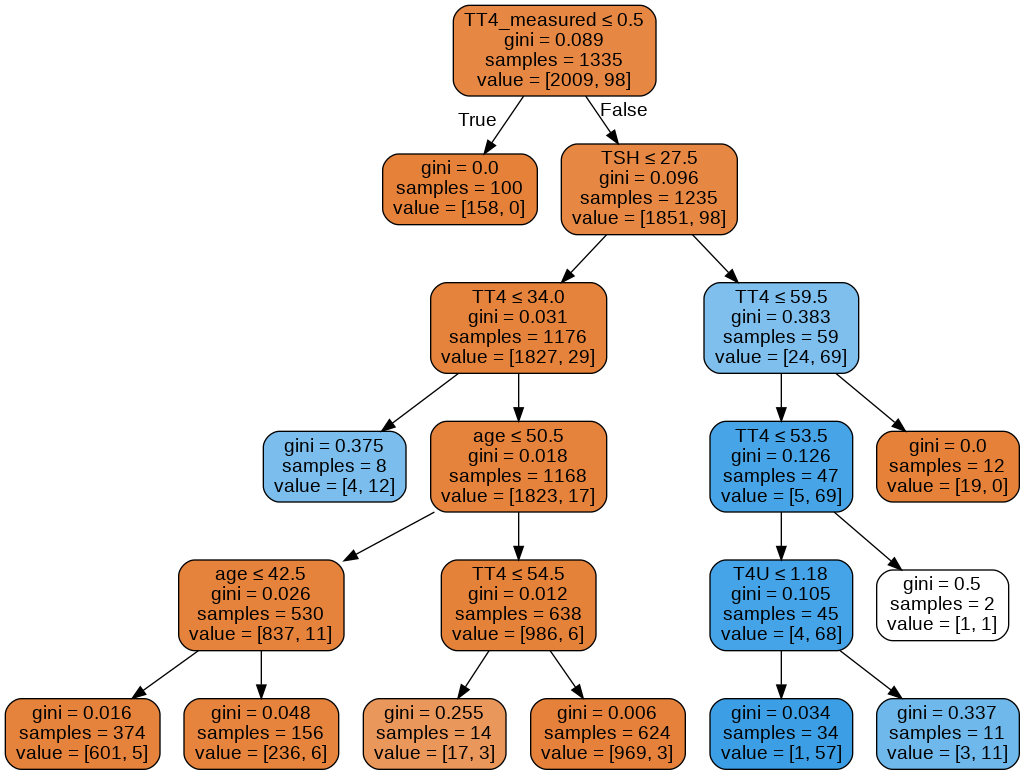

[('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.02), ('T3_measured', 0.0), ('TT4_measured', 0.0), ('T4U_measured', 0.0), ('FTI_measured', 0.0), ('age', 0.02), ('TSH', 0.12), ('T3', 0.03), ('TT4', 0.04), ('T4U', 0.01), ('FTI', 0.76)]

Variable: FTI                  Importance: 0.76
Variable: TSH                  Importance: 0.12
Variable: TT4                  Importance: 0.04
Variable: T3                   Importance: 0.03
Variable: TSH_measured         Importance: 0.02
Variable: age                  Importance: 0.02
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance:

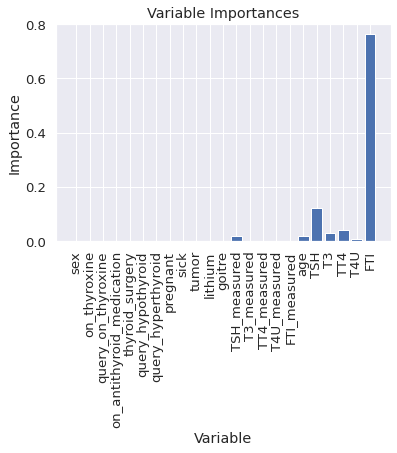

In [25]:
# here we pass in the number of n estimators, minimum sample splits and the maximum depth 
# they are in that order
# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

From our function we can see that the most important feature in our prediction is FTI followed by TSH, TT4, T3, T4U and lastly age. We do observe that only the categorical columns have an influence to the dependent variable.

#### Function call 1 with the important features

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.030973
std      0.193026    0.173342
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      1.000000    1.000000
The accuracy score is: 0.9834070796460177
The f1 score is: 0.7619047619047619


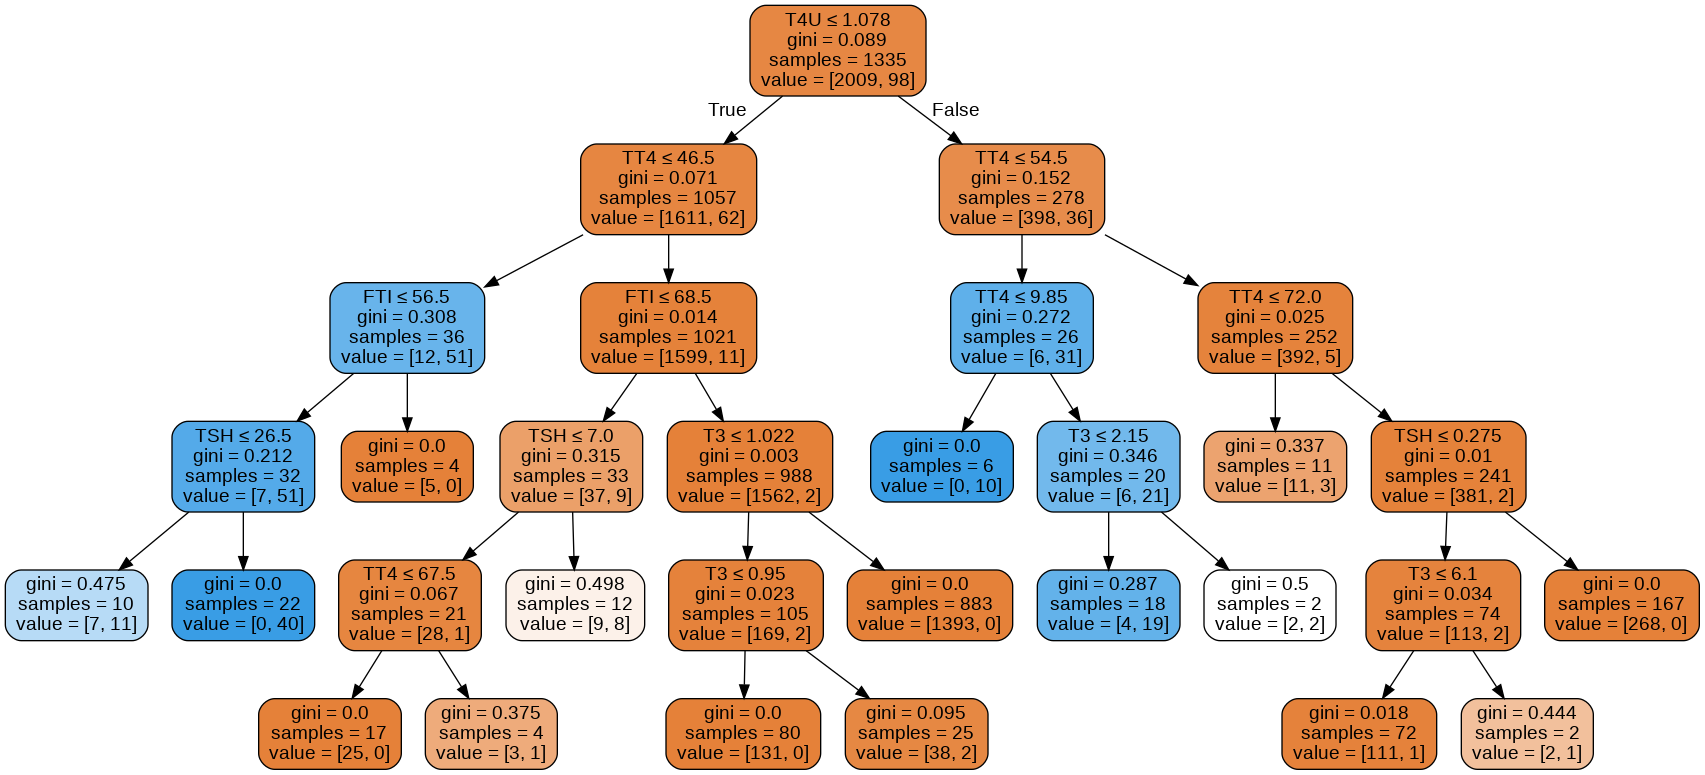

[('age', 0.04), ('TSH', 0.13), ('T3', 0.03), ('TT4', 0.02), ('T4U', 0.01), ('FTI', 0.77)]

Variable: FTI                  Importance: 0.77
Variable: TSH                  Importance: 0.13
Variable: age                  Importance: 0.04
Variable: T3                   Importance: 0.03
Variable: TT4                  Importance: 0.02
Variable: T4U                  Importance: 0.01


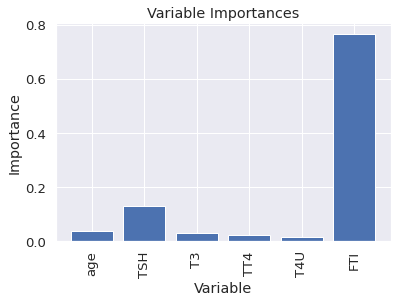

In [26]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

The scores remain the same even after using just the most important features. Now we will alter the depth.

#### Function call 2 important features

We are now going to alter the size of the depth and min sample splits.

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.032080
std      0.193026    0.176309
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      1.000000    1.000000
The accuracy score is: 0.9823008849557522
The f1 score is: 0.75


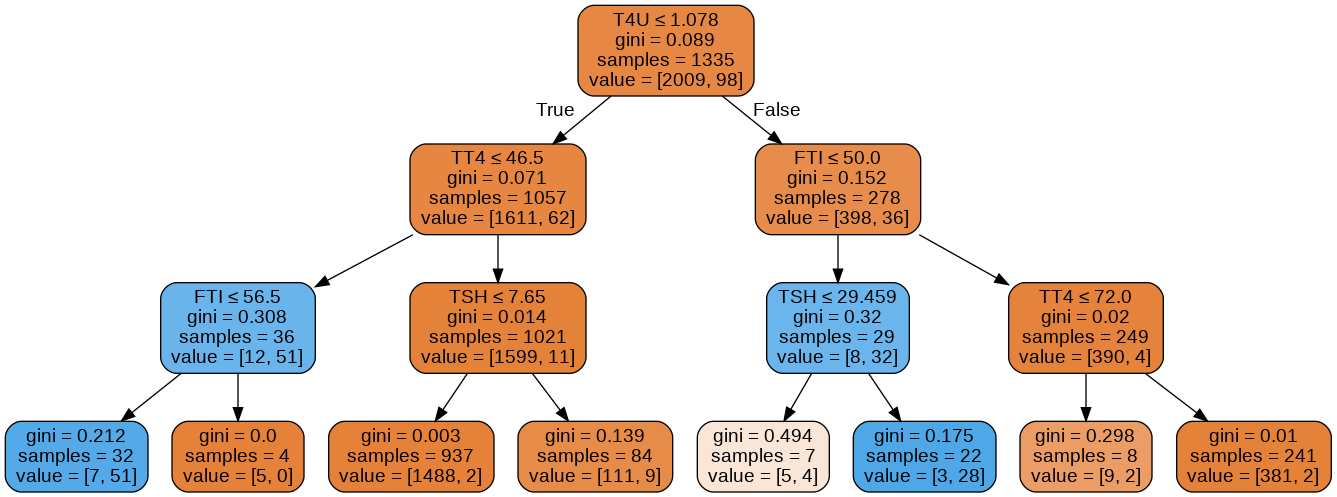

[('age', 0.0), ('TSH', 0.13), ('T3', 0.02), ('TT4', 0.02), ('T4U', 0.0), ('FTI', 0.83)]

Variable: FTI                  Importance: 0.83
Variable: TSH                  Importance: 0.13
Variable: T3                   Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: age                  Importance: 0.0
Variable: T4U                  Importance: 0.0


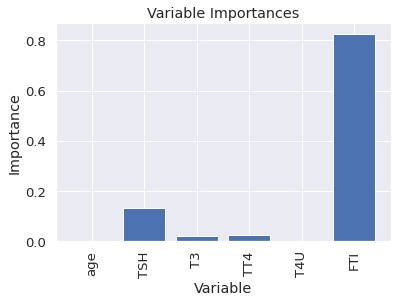

In [27]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

# we start off with 300, 20, 3
a.rand_tree(300, 20, 3)

At a depth of 3 the accuracy score drops from 0.9834 to 0.9823 and the f1 score drops from 0.76 to 0.75

#### Function call 3 important features

           Actual   Predicted
count  904.000000  904.000000
mean     0.038717    0.030973
std      0.193026    0.173342
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      1.000000    1.000000
The accuracy score is: 0.9856194690265486
The f1 score is: 0.7936507936507937


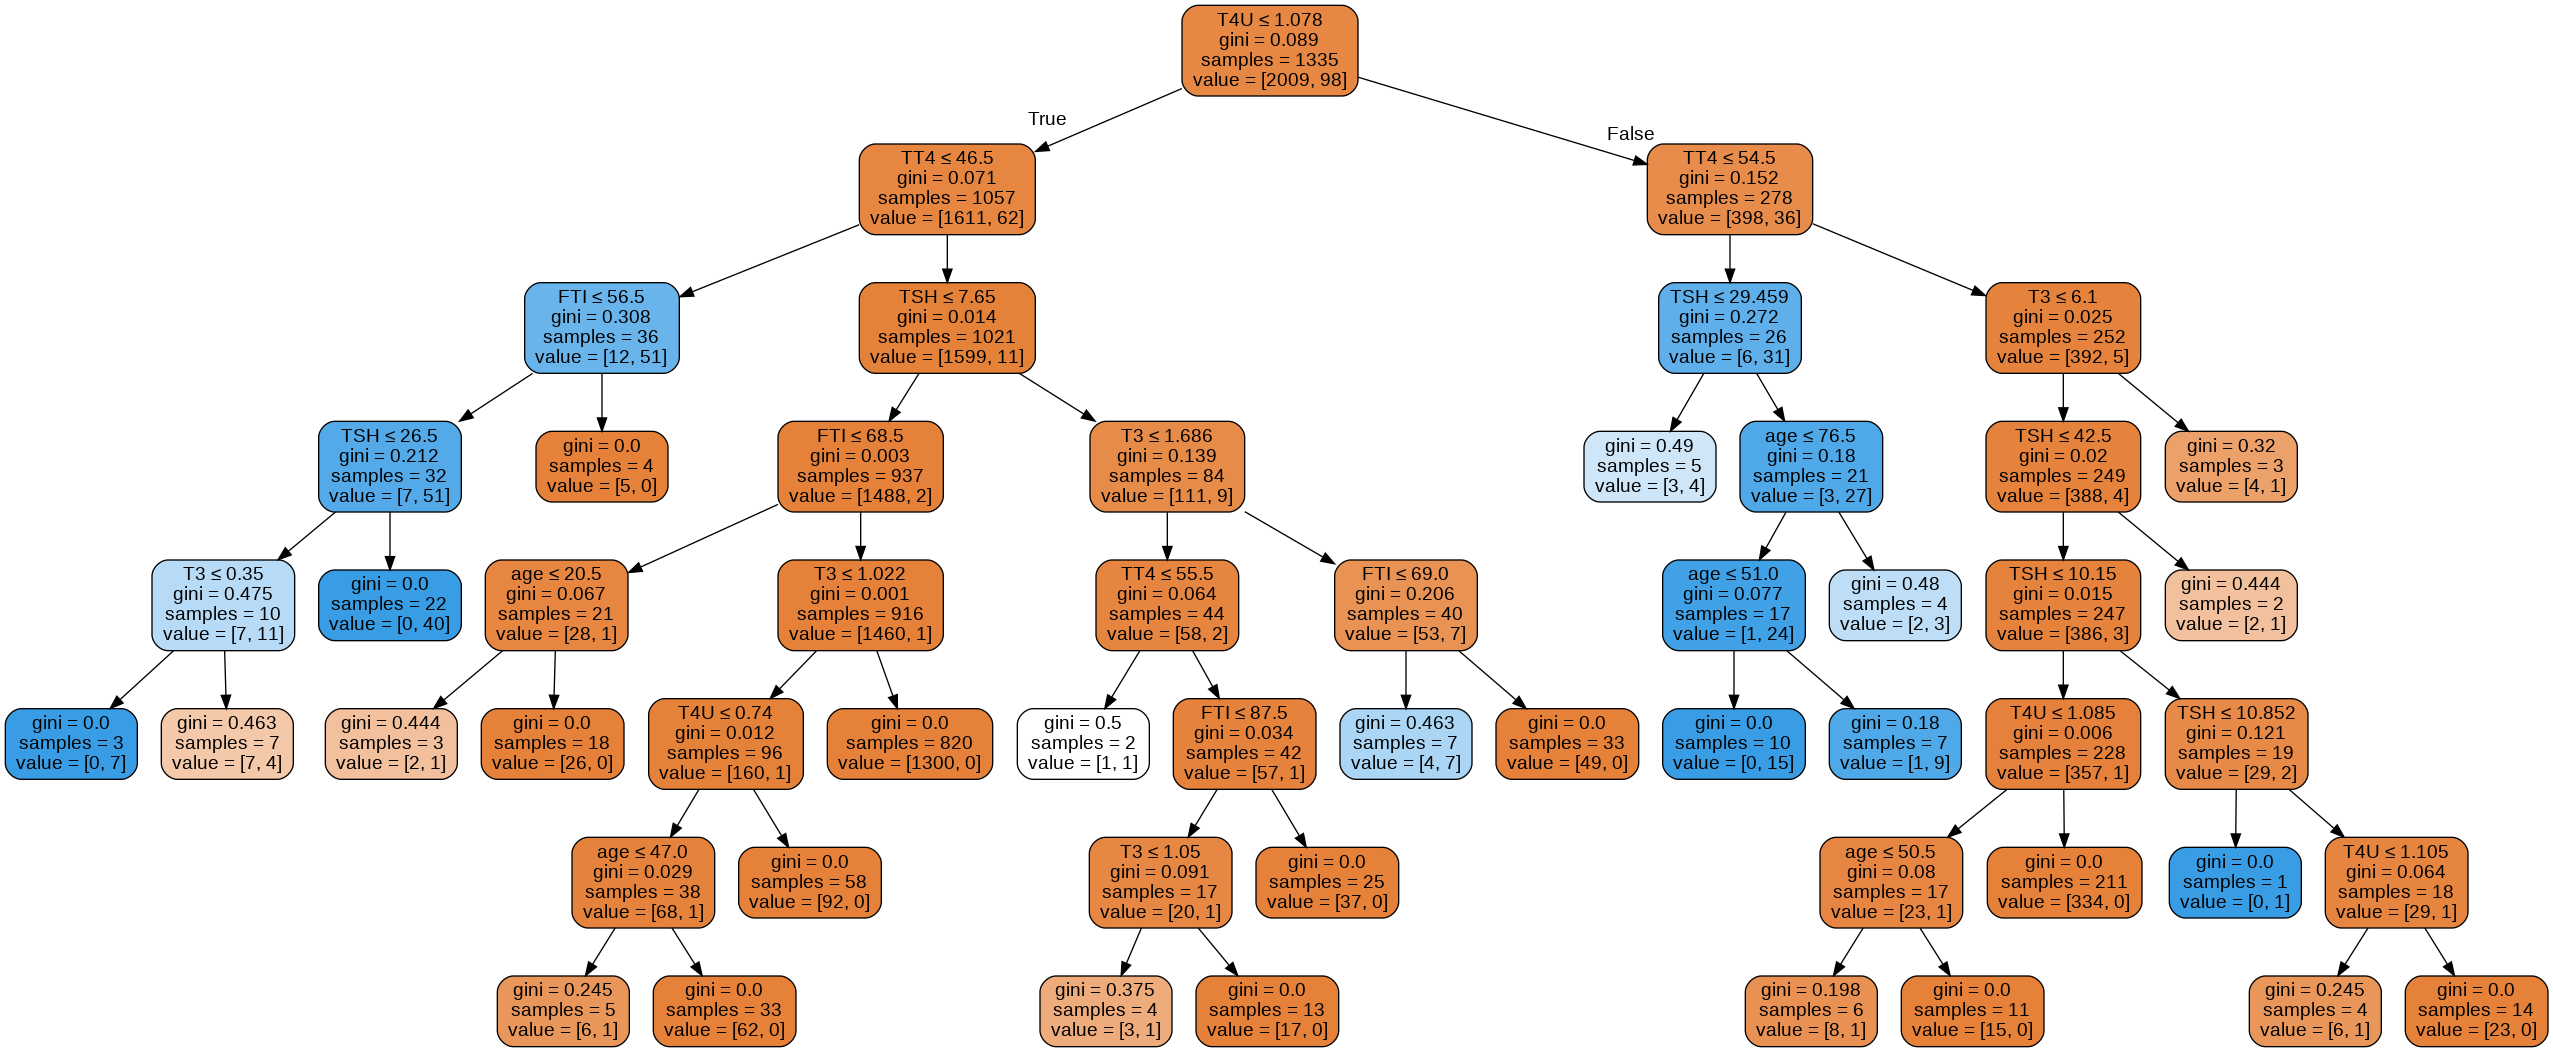

[('age', 0.04), ('TSH', 0.12), ('T3', 0.05), ('TT4', 0.04), ('T4U', 0.05), ('FTI', 0.69)]

Variable: FTI                  Importance: 0.69
Variable: TSH                  Importance: 0.12
Variable: T3                   Importance: 0.05
Variable: T4U                  Importance: 0.05
Variable: age                  Importance: 0.04
Variable: TT4                  Importance: 0.04


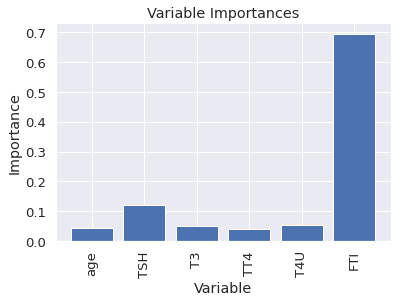

In [28]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

# we start off with 300, 10, 20
a.rand_tree(300, 10, 20)

We observe that at a depth of 20 the accuracy increases from 0.9823 to 0.9855 and the f1 score raises from 0.75 to 0.7936. We will perform a hyper parameter tuning to find the best values.

### Ada Boost

In [29]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Function

In [58]:
rng = np.random.RandomState(1)
class ada:
  def __init__ (self, X, y):
    self.X = X
    self.y = y
  
  def adas(self, d, n):
    for i in np.arange(0, 6, 1):
      tree = DecisionTreeClassifier(max_depth=d)

      # Train it on our training set.
      tree = tree.fit(X_train, y_train)
      # Predict based on the model we've trained, note that we apply it to the whole data set this time
      y_pred_tree = tree.predict(X)

      ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=n, random_state=rng)
      ada_boost = ada_boost.fit(X_train, y_train)
      y_pred_ada = ada_boost.predict(X)

      plt.figure()
      plt.scatter(X.iloc[:, i], y, c="k", label="training samples")
      plt.plot(X.iloc[:, i], y_pred_tree, c="r", label="single tree", linewidth=2)
      plt.plot(X.iloc[:, i], y_pred_ada, c="g", label="ada_{}".format(n), linewidth=2)

      plt.xlabel("data")
      plt.ylabel("target")
      plt.title(f"Basic data for {test_features[i]}", color = 'blue')
      plt.legend()
      plt.show()

#### 500 n_estimators

##### Function call 1

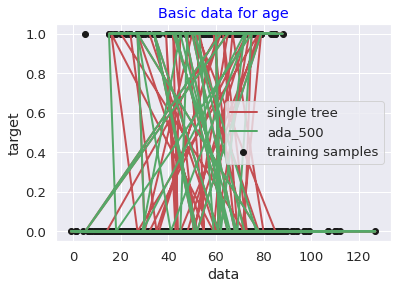

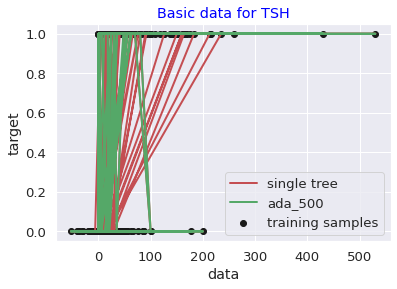

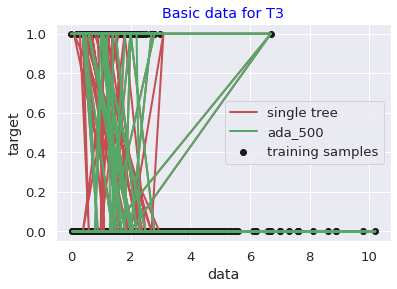

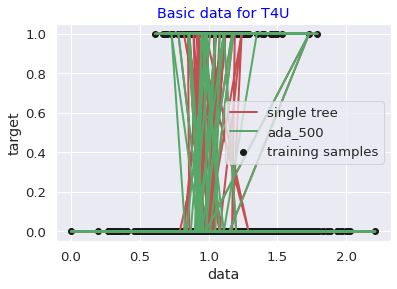

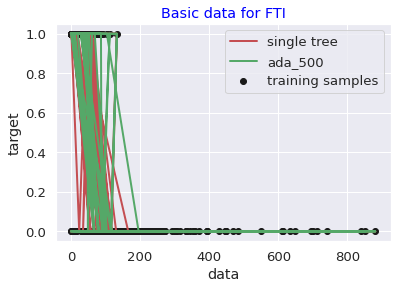

In [59]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = ada(X, y)
a.adas(5, 500)

At 5 depth and 500 n_estimaros we see that the model performs and scales better than the single tree. But the model is overfitted

##### Function call 2

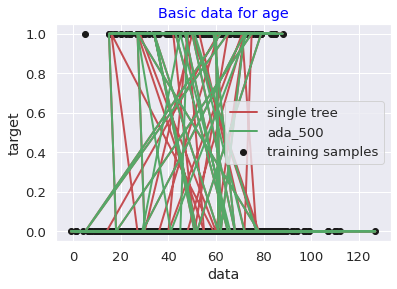

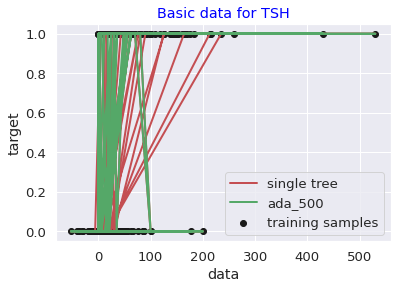

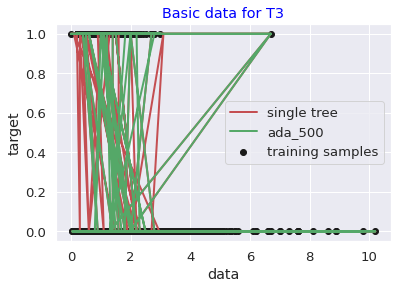

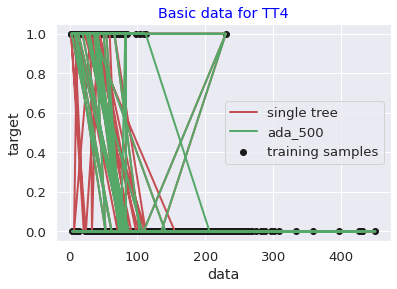

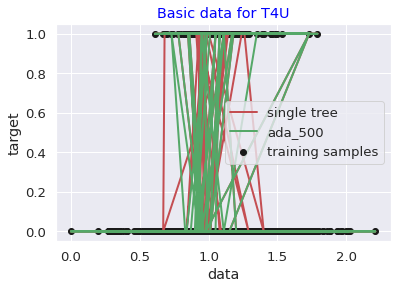

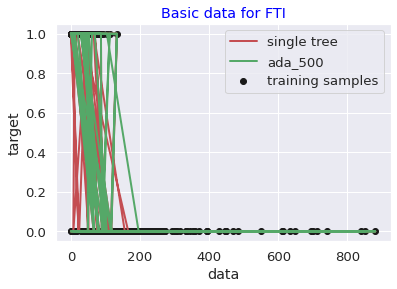

In [60]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = ada(X, y)
# we change the depth of the tree but maintain the n estimators
a.adas(7, 500)

At a depth of 7 and n_estimators of 500 the model is clearly overfitted.

##### Function call 3

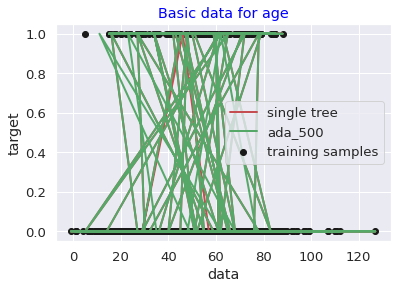

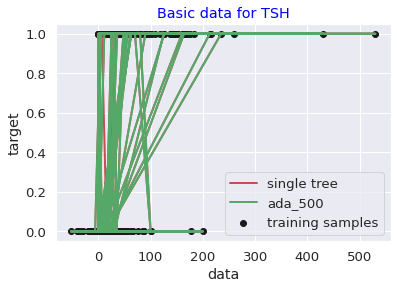

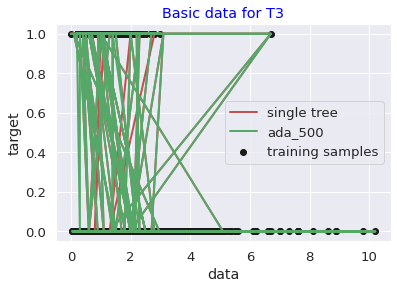

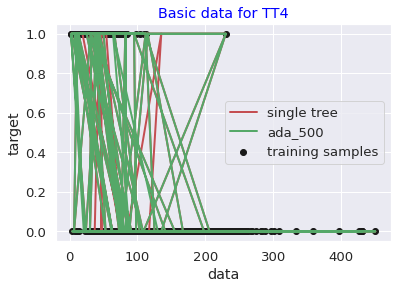

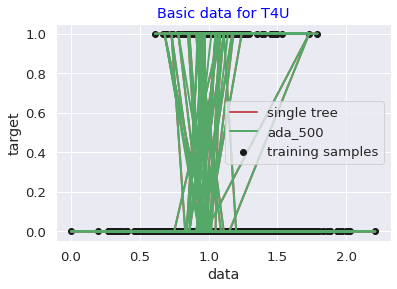

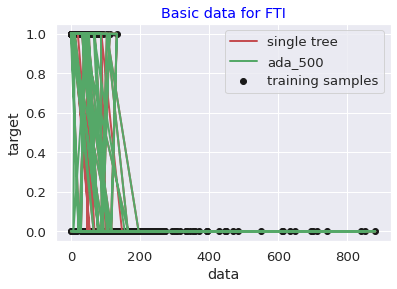

In [61]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = ada(X, y)
# we change the depth to 10
a.adas(10, 500)

As the depth increases the model becomes really overfitted. In the depth of 7 we have nearly perfect mapping at 10 it is clearly over fitted. We will challenge our solution later to determine the best parameters for the depth.

#### 300 n_estimators

##### Function call 4 

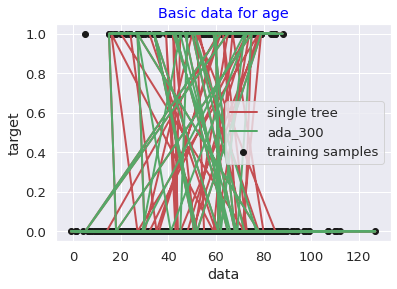

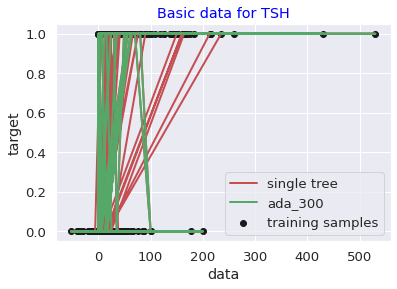

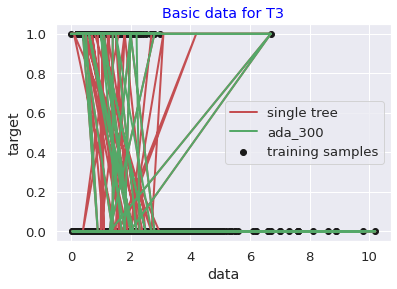

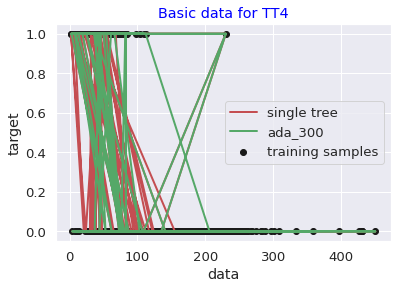

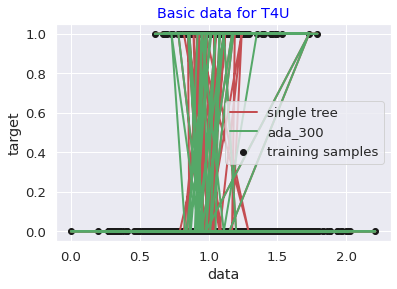

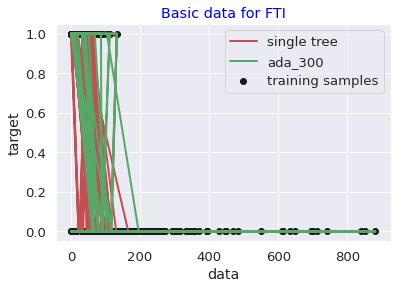

In [62]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = ada(X, y)
# we just change the n estimators 
a.adas(5, 300)

At 300 n_estimators there are some data points that are clearly not fitted. We will need to find the best parameters for n_estimators to avoid underfitting our model. Most of the independent variables are however overfitted.

##### Function call 5 

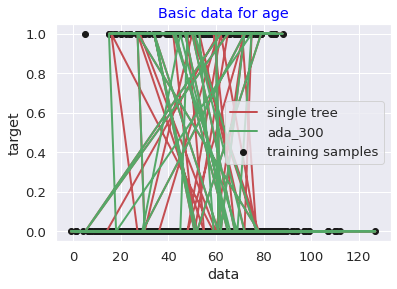

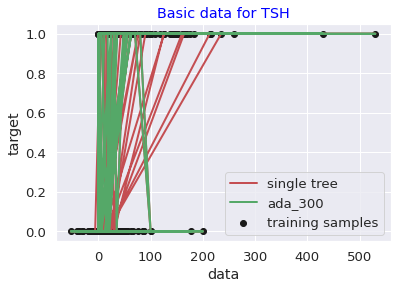

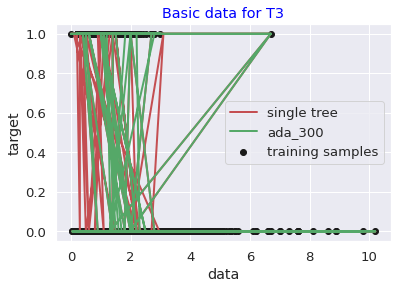

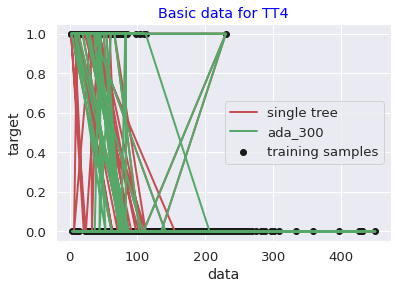

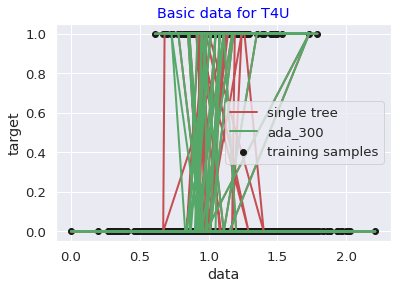

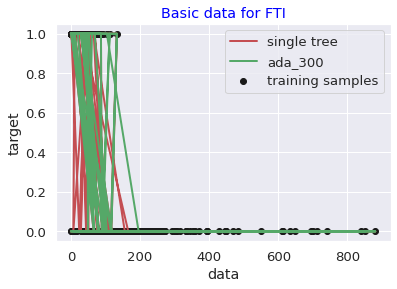

In [63]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = ada(X, y)
# we just change the n estimators 
a.adas(7, 300)

##### Function call 6

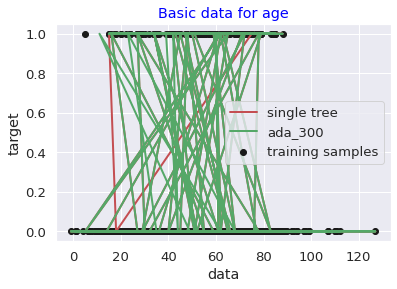

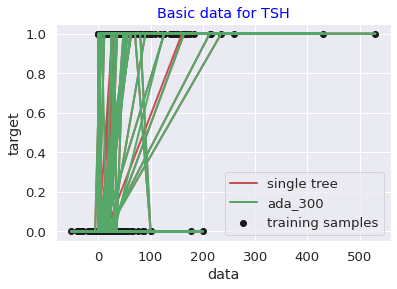

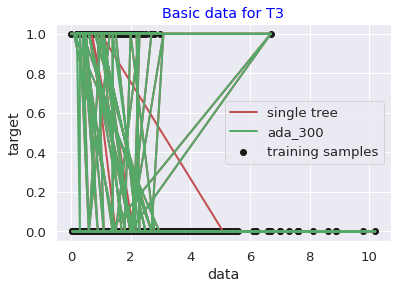

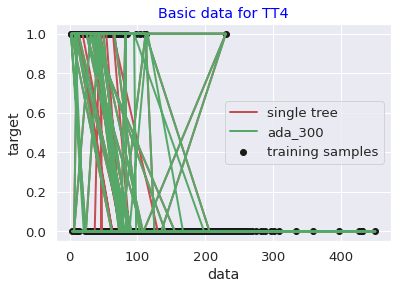

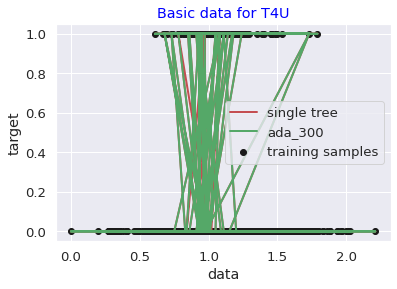

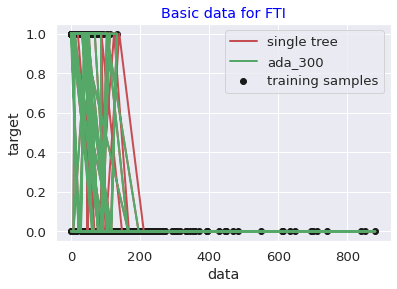

In [64]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = ada(X, y)
# we just change the n estimators 
a.adas(10, 300)

It is clear that as the depth increases the model becomes overfitted. We need to perform hyperparameter tuning. We observe that the 300 and 500 n_estimators overfit our model.

### Gradient Boost

This model is just for comparison purposes, we will consider our random forest classifier and the ada boosting classifier.

#### Function

In [65]:
class grade:
  def __init__ (self, X, y):
    self.X = X
    self.y = y
  def grades(self, n, l, d):
    for i in np.arange(0, 6, 1):
      tree = DecisionTreeClassifier(max_depth=d)

      # Train it on our training set.
      tree = tree.fit(X_train, y_train)
      # Predict based on the model we've trained, note that we apply it to the whole data set this time
      y_pred_tree = tree.predict(X)

      ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=n, random_state=rng)
      ada_boost = ada_boost.fit(X_train, y_train)
      y_pred_ada = ada_boost.predict(X)

      target_number_of_trees = n

      gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate = l, max_depth = d)
      gbr = gbr.fit(X_train, y_train)

      y_pred_gbr = gbr.predict(X)

      plt.figure()
      plt.scatter(X.iloc[:, i], y, c="k", label="training samples")
      plt.plot(X.iloc[:, i], y_pred_tree, c="r", label="single tree", linewidth=4)
      plt.plot(X.iloc[:, i], y_pred_ada, c="g", label="ada_{}".format(n), linewidth=4)
      plt.plot(X.iloc[:, i], y_pred_gbr, c="b", label="gbr_{}".format(n))
      plt.xlabel(f"data for {test_features[i]}")
      plt.ylabel("target")
      plt.title(f"Basic data for {test_features[i]}")
      plt.legend()
      plt.show()

      def dev(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f'Deviance for {test_features[i]}')

        # This is plotted against a simple list that goes from 1 to our target number of trees.
        plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
                label='Training Set Deviance')
        # We will compare our predictions at each stage against the test data, and compute the deviance
        test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

        for j, y_pred in enumerate(gbr.staged_predict(X_test)):
            # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
            test_score[j] = gbr.loss_(y_test, y_pred)
            
        plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
                label='Test Set Deviance')

        plt.legend(loc='upper right')
        plt.xlabel('Boosting Iterations')
        plt.ylabel(f'Deviance for {test_features[i]}')
        plt.show()
      dev(self)

#### Function call 1

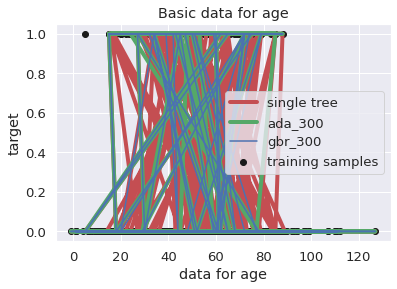

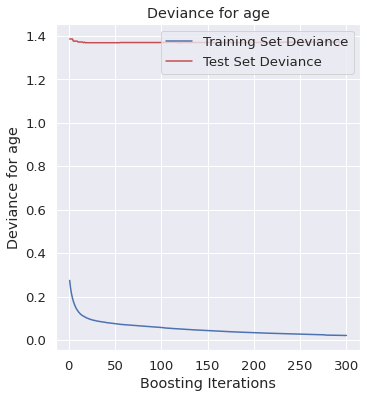

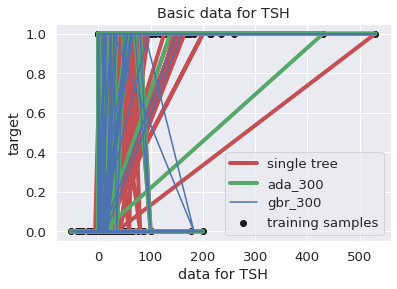

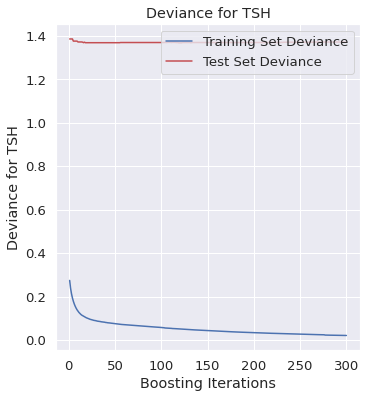

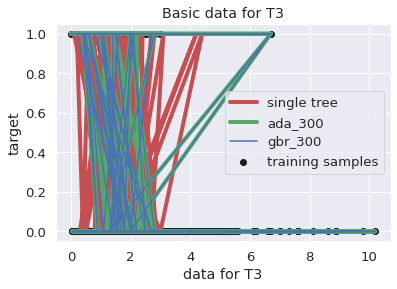

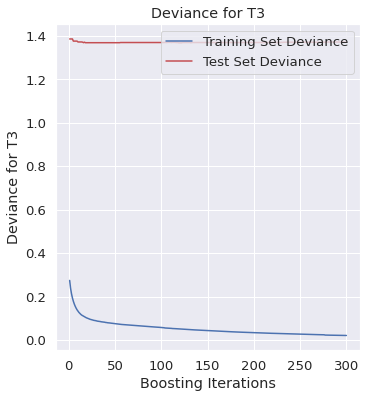

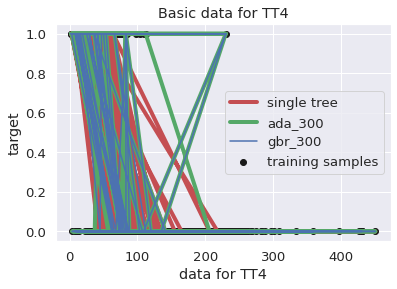

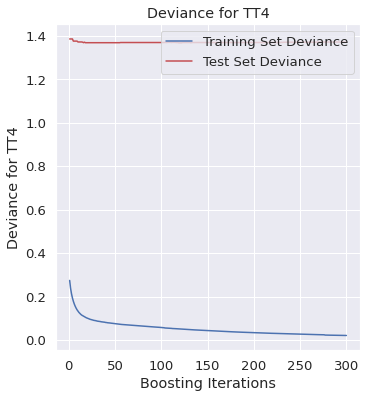

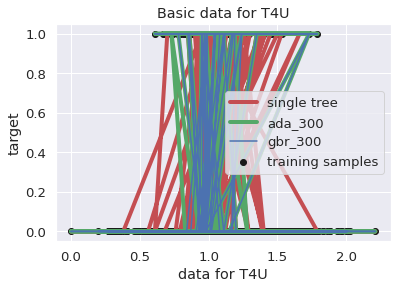

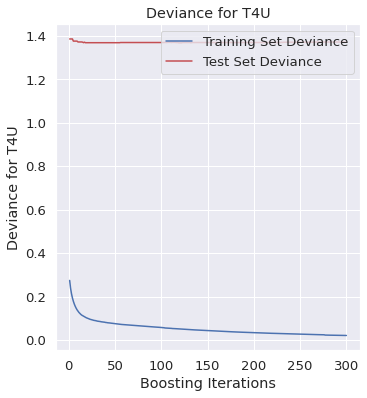

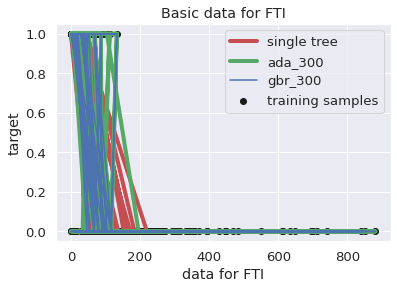

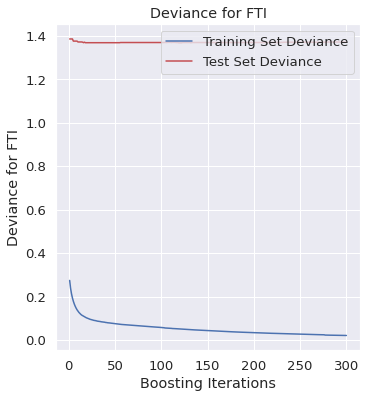

In [66]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

a = grade(X, y)

# we are max n_estimators, the learning rate and the max depth
a.grades(300, 0.1, 2)

### Function to get the accuracy score and f1 score and compare them 

In [31]:
class accurate:
  def __init__ (self, X, y):
    self.X = X
    self.y = y
  def adaccurate(self, d, l, n):
    rng = np.random.RandomState(1)
    ada_boost = AdaBoostClassifier(n_estimators=n, random_state=rng, learning_rate= l)
    ada_boost = ada_boost.fit(X_train, y_train)
    y_pred_ada = ada_boost.predict(X_test)
    
   # And now we assess the errors
    print(f'The accuracy score is: {accuracy_score(y_test, y_pred_ada)} and the f1 score is {f1_score(y_test, y_pred_ada)}')
  def gradaccurate(self, n, l, d):
    gbr = GradientBoostingClassifier(n_estimators=n, learning_rate = l, max_depth = d)
    gbr = gbr.fit(X_train, y_train)
    y_pred_gbr = gbr.predict(X_test)
    # And now we assess the errors
    print(f'The accuracy score is: {accuracy_score(y_test, y_pred_gbr)} and the f1 score is {f1_score(y_test, y_pred_gbr)}')
  def randaccurate(self, n, s, d):
    forest = RandomForestClassifier(n_estimators =n, random_state=42, min_samples_split =s, max_depth=d)
    forest = forest.fit(X_train, y_train)
    y_pred_forest = forest.predict(X_test)
    # And now we assess the errors
    print(f'The accuracy score is: {accuracy_score(y_test, y_pred_forest)} and the f1 score is {f1_score(y_test, y_pred_forest)}')

#### a. 300 n_estimators, 5 max_depth, 0.1 learning rate, and 20 min_samples

In [68]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
a = accurate(X, y)
a.adaccurate(5, 1, 300)

The accuracy score is: 0.9834070796460177 and the f1 score is 0.7692307692307692


In [69]:
a.gradaccurate(300, 0.1, 5)

The accuracy score is: 0.9867256637168141 and the f1 score is 0.8181818181818182


In [70]:
a.randaccurate(300, 20, 5)

The accuracy score is: 0.9834070796460177 and the f1 score is 0.7619047619047619


The gradient boosting performs the best at an accuracy of 0.9867 and an f1 score of 0.8181

#### b. 300 n_estimators, 7 max_depth, 0.1 learning rate, and 20 min_samples

In [71]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
a = accurate(X, y)
# call the ada boost classifer
a.adaccurate(7, 1, 300)

The accuracy score is: 0.9834070796460177 and the f1 score is 0.7692307692307692


In [72]:
# gradient boost classifier
a.gradaccurate(300, 0.1, 7)

The accuracy score is: 0.9800884955752213 and the f1 score is 0.7000000000000001


In [73]:
# random forest classifier
a.randaccurate(300, 20, 7)

The accuracy score is: 0.9845132743362832 and the f1 score is 0.7812500000000001


The best performing model here  is the random forest classifier with an F1 score of 0.78 and an accuracy of 0.9845

#### c. 300 n_estimators, 10 max_depth, 0.1 learning rate, and 20 min_samples

In [74]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
a = accurate(X, y)
# ada boost classifier
a.adaccurate(10, 1, 300)

The accuracy score is: 0.9834070796460177 and the f1 score is 0.7692307692307692


In [75]:
# gradient boost classifier
a.gradaccurate(300, 0.1, 10)

The accuracy score is: 0.9823008849557522 and the f1 score is 0.7575757575757576


In [76]:
# random forest classifier
a.randaccurate(300, 20, 10)

The accuracy score is: 0.9834070796460177 and the f1 score is 0.7692307692307692


The best performing model here is the random forest classifier and the ada boost with an accuracy of 0.9834 and an f1 score of 0.7692

#### a.  500 n_estimators, 5 max_depth, 0.1 learning rate, 20 min_samples

In [77]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
a = accurate(X, y)
# ada boost classifier
a.adaccurate(5, 1, 500)

The accuracy score is: 0.9800884955752213 and the f1 score is 0.71875


In [78]:
# gradient boost classifier
a.gradaccurate(500, 0.1, 5)

The accuracy score is: 0.9834070796460177 and the f1 score is 0.7692307692307692


In [79]:
# random forest classifier
a.randaccurate(500, 20, 5)

The accuracy score is: 0.9834070796460177 and the f1 score is 0.7619047619047619


The best performing models are random forest and gradient boost with an accuracy score of 0.9834 and f1 score of 0.7619 and 0.7692 respectively.

#### b. 500 n_estimators, 7 max_depth, 0.1 learning rate, and 20 min_samples

In [80]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
a = accurate(X, y)
# ada boost classifier
a.adaccurate(7, 1, 500)

The accuracy score is: 0.9800884955752213 and the f1 score is 0.71875


In [81]:
# gradient boost classifier
a.gradaccurate(500, 0.1, 7)

The accuracy score is: 0.9811946902654868 and the f1 score is 0.721311475409836


In [82]:
# random forest classifier
a.randaccurate(500, 20, 7)

The accuracy score is: 0.9845132743362832 and the f1 score is 0.7812500000000001


The best performing model random forest classifier with and accuracy of 0.9845 and an f1 score of 0.7812

#### c. 500 n_estimators, 10 max_depth, 0.1 learning rate, and 20 min_samples

In [83]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
a = accurate(X, y)
# ada boost classifier
a.adaccurate(10, 1, 500)

The accuracy score is: 0.9800884955752213 and the f1 score is 0.71875


In [84]:
# gradient boost classifier
a.gradaccurate(500, 0.1, 10)

The accuracy score is: 0.9811946902654868 and the f1 score is 0.7384615384615385


In [85]:
# random forest classifier
a.randaccurate(500, 20, 10)

The accuracy score is: 0.9845132743362832 and the f1 score is 0.7812500000000001


The best performing model is random forest classifier with an accuracy score of 0.9845 and an f1 score of 0.7812

We observe that at 300 n_ estimators as we change the max depth the perfomance of the models does not improve from 0.9845. This is the highest achieved by any model at any depth or n_estimators. The F1 score does fluctuate as we make changes but the best performing throught out is the random forest regressor.
At 500 n_estimators similar results are observed as we change the max depth.

### Challenging the solution

#### Random forest challenge

In [32]:
# dependent and independent variables
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# parameters to tune
params = {'n_estimators': [10, 20, 30, 50, 100], 'max_depth': [1, 2, 3, 4, 5, 7, 10, 15], 'min_samples_split': [2, 10, 15, 20]}

# number of folds
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# fitting
search.fit(X, y)

# print out the best parameters
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 15, 'min_samples_split': 15, 'n_estimators': 10}


In [34]:
# random forest classifier
a.randaccurate(10, 15, 15)

The accuracy score is: 0.9856194690265486 and the f1 score is 0.8


It is important to note that every time we run the tuning the values fluctuate from a depth of 2 to 15 but  the perfomance is consistent with whatever of the values we use from the best parameters. In that the perfmance does not go beyond 0.98. This might indicate that we are the most optimal point for our data that as we change the values there is no perfomance increase.

#### Ada boost challenge

In [88]:
# dependent and independent variables
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# parameters to tune
params = {'n_estimators': [10, 20, 30, 50, 100, 200, 300, 500, 600], 'learning_rate': [1, 2, 3, 4, 5]}

# number of folds
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# fitting
search.fit(X, y)

# print out best parameters
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 50}


In [33]:
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
X = forest[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
a = accurate(X, y)
a.adaccurate(5, 1, 50)

The accuracy score is: 0.9823008849557522 and the f1 score is 0.7714285714285715


Our assumption was that if we got the best parameters our accuracy and F1 scores would imporve. As it turns out the random forest classifier remains the same. This might indicate that we have reached the maximum threshold for our parameter and thus they do not affect our model anymore. 

This is the same for the ada boost.

## 6. Suport Vector Classifier

#### Fitting the svm functions

In [91]:
# create and load our models
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# list of models
svm_models = [poly, linear, rbf]

model_names = ['Polynomial', 'Linear', 'rbf']

# function
def predictor(svm_models, X, y):
  # get training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # standardize our data 
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  

  svm_models.fit(X_train, y_train)
  y_pred = svm_models.predict(X_test)
  
  # get the scores
  f_score = f1_score(y_test, y_pred)
  accurate_score = accuracy_score(y_test, y_pred)

  return  accurate_score, f_score, svm_models


In [92]:
# print the scores
for svm_models, name in zip(svm_models, model_names):
  # we use the function above and the loop to get us the accuracy scores and f1 scores for each model.
  print(f'The accuracy score of {name:<10} is: {predictor(svm_models, X, y)[0]} and the f1 score is: {predictor(svm_models, X, y)[1]}')

The accuracy score of Polynomial is: 0.9800884955752213 and the f1 score is: 0.689655172413793
The accuracy score of Linear     is: 0.9800884955752213 and the f1 score is: 0.689655172413793
The accuracy score of Rbf        is: 0.9823008849557522 and the f1 score is: 0.7333333333333334


The best performing model is the radial basis function it has the highest accuracy and f1 score.

#### Hyper parameter tuning

In [95]:
# this are the ranges for our c and gamma
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# setting the kfolds
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# getting the dependent and independent variables
X = forest[test_features]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# fit the model
search.fit(X, y)

# search for the best parameters
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'gamma': 0.03125, 'C': 11}


**We know use the above gamma and c to remodel our linear model.**

In [97]:
# get the independent and dependent variables
test_features = ['TSH','FTI']
X = forest[['TSH','FTI']]
y = np.where(forest['status'] == 'hypothyroid', 1, 0)

# get the training and testing sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc = SVC(C = 11, gamma = 0.03125, kernel='linear')
svc.fit(X_train, y_train)

# predict
y_pred = svc.predict(X_test)

# display the scores of our model 
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9800884955752213 and the f1 score is 0.689655172413793




array([[866,   3],
       [ 15,  20]])

Based on the previous linear SVM model there is no improvement in both the accuracy and f1 score. This tells us that even with the best parameters there is no increase. The accuracy remains at 98% which is the same as the decision tree based models.

It is important to note that trying parameter tuning on the other SVC models takes a long time as such we did not run them. 

## 7. Conclusion

We observed that most of the data was of patients that tested negative thus we feel the need to gather more data about patients with hypothyroid in order to have more characteristiscs about them.

In the decision tree based models the best performing is the random forest classifer with an accuracy score of 0.9855 and an f1 score of 0.8. This is with a max depth of 15 min_sample splits of 15 and n_estimators of 10. We observed that at 300 and 500 n_estimators the models were overfitted. 

In the SVM models the best performing is Radial Basis Funcition (RBF) with and accuracy of 0.98233 and an f1 score of 0.7333. It is clear that the random forest classifier worked best in the prediction. 

One other thing to note is that the SVM plots would take long and eventually fail (They were computationally complex).

The parameter tuning for the SVM models also took alot of time, we ended doing just one for the linear model. With more computing power we could find the best parameters and probably improve the performance of our SVM models.

## Recommendations

1. We recommend that Nairobi hospital gathers more data.
2. Focus the clinical tests on the 2 most important hormones that is FTI and TSH.


## Follow up questions

We have concluded that FTI and TSH are the most important hormones in determining whether a patient has hypothyroid or not. As such the question is are the other hormone tests necessary during the clinic?